Top 10 highest paid employees (by TotalPayBenefits)

Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

Number of unique agencies

Show Average BasePay, OvertimePay, and TotalPay for year 2011

Plot the top 10 job titles with the highest TotalPay in 2014.


Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

Find all employees whose job titles contain the word “CHIEF”

Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

Distinct job titles starting with "CAPTAIN"


Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sql.connect('database (2).sqlite')
conn

In [7]:
query1 = '''
SELECT Year, EmployeeName, JobTitle, TotalPayBenefits
FROM Salaries
ORDER BY TotalPayBenefits DESC
LIMIT 10;
'''
top10 = pd.read_sql_query(query1, conn)
top10

,Year,EmployeeName,JobTitle,TotalPayBenefits
0,2011,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,2014,David Shinn,Deputy Chief 3,510732.68
2,2014,Amy P Hart,Asst Med Examiner,479652.21
3,2014,William J Coaker Jr.,Chief Investment Officer,436224.36
4,2013,Gregory P Suhr,Chief of Police,425815.28
5,2013,Joanne M Hayes-White,"Chief, Fire Department",422353.40
6,2014,Gregory P Suhr,Chief of Police,418019.22
7,2014,Joanne M Hayes-White,"Chief, Fire Department",417435.10
8,2014,Ellen G Moffatt,Asst Med Examiner,415767.94
9,2012,Gary Altenberg,"Lieutenant, Fire Suppression",407274.78


In [8]:
query2 = '''
SELECT DISTINCT Year
FROM Salaries
WHERE LOWER(EmployeeName) LIKE '%not provided%'
OR LOWER(JobTitle) LIKE '%not provided%';
'''
missing_years = pd.read_sql_query(query2, conn)
missing_years

,Year
0,2011
1,2012
2,2014


In [18]:
query3 = '''
SELECT COUNT(DISTINCT Agency) AS Unique_Agencies
FROM Salaries;
'''
pd.read_sql_query(query3, conn)

,Unique_Agencies
0,1


In [9]:
query4 = '''
SELECT AVG(BasePay) AS Avg_BasePay,
AVG(OvertimePay) AS Avg_OvertimePay,
AVG(TotalPay) AS Avg_TotalPay
FROM Salaries
WHERE Year = 2011;
'''
pd.read_sql_query(query4, conn)

,Avg_BasePay,Avg_OvertimePay,Avg_TotalPay
0,63593.401894,4524.411277,71992.050063


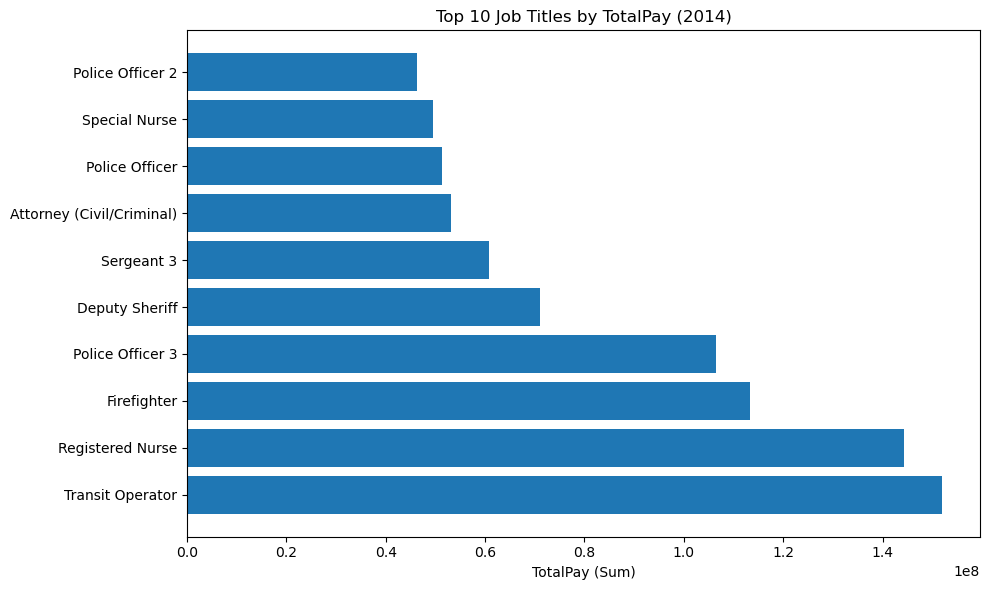

In [10]:
query5 = '''
SELECT JobTitle, SUM(TotalPay) AS TotalPaySum
FROM Salaries
WHERE Year = 2014
AND LOWER(JobTitle) NOT LIKE '%not provided%'
GROUP BY JobTitle
ORDER BY TotalPaySum DESC
LIMIT 10;
'''
top10_2014 = pd.read_sql_query(query5, conn)


plt.figure(figsize=(10,6))
plt.barh(top10_2014['JobTitle'], top10_2014['TotalPaySum'])
plt.title('Top 10 Job Titles by TotalPay (2014)')
plt.xlabel('TotalPay (Sum)')
plt.tight_layout()
plt.show()

In [12]:
query6 = '''
SELECT DISTINCT JobTitle, OvertimePay
FROM Salaries
WHERE OvertimePay > 150000
AND LOWER(JobTitle) NOT LIKE '%not provided%'
ORDER BY Overtimepay DESC;
'''
pd.read_sql_query(query6, conn)

,JobTitle,OvertimePay
0,"Lieutenant, Fire Suppression",220909.48
1,Deputy Sheriff,196689.18
2,EMT/Paramedic/Firefighter,192424.49
3,Deputy Sheriff,173547.73
4,Deputy Sheriff,173178.23
5,Deputy Sheriff,169659.92
6,"Lieutenant, Fire Suppression",163477.81
7,Firefighter,160418.47
8,Deputy Sheriff,156077.49


In [13]:
query7 = '''
SELECT Year, EmployeeName, JobTitle
FROM Salaries
WHERE LOWER(JobTitle) LIKE '%chief%';
'''
pd.read_sql_query(query7, conn)

,Year,EmployeeName,JobTitle
0,2011,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,2011,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,2011,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,2011,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,2011,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...,...
622,2014,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,2014,Anita S Lee,Chief Clerk
624,2014,George D Vaughan,Chief Nursery Specialist
625,2014,Patrick W Gillespie,Chief Preparator


In [14]:
query8 = '''
SELECT Year,
SUM(CASE WHEN LOWER(JobTitle) LIKE '%engineer%' THEN 1 ELSE 0 END) AS Engineer_Count,
SUM(CASE WHEN LOWER(JobTitle) LIKE '%fire%' THEN 1 ELSE 0 END) AS Fire_Count
FROM Salaries
WHERE Year IN (2012, 2013)
GROUP BY Year;
'''
pd.read_sql_query(query8, conn)

,Year,Engineer_Count,Fire_Count
0,2012,1022,1449
1,2013,1054,1460


In [15]:
query9 = '''
SELECT DISTINCT JobTitle
FROM Salaries
WHERE UPPER(JobTitle) LIKE 'CAPTAIN%';
'''
pd.read_sql_query(query9, conn)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


In [16]:
query10 = '''
SELECT Year, EmployeeName, JobTitle, BasePay, TotalPayBenefits
FROM Salaries
WHERE BasePay > 50000
AND TotalPayBenefits < 150000
AND LOWER(EmployeeName) NOT LIKE '%not provided%'
AND LOWER(JobTitle) NOT LIKE '%not provided%';
'''
pd.read_sql_query(query10, conn)

,Year,EmployeeName,JobTitle,BasePay,TotalPayBenefits
0,2011,JAY DOWKE,POLICE OFFICER III,112380.37,149987.24
1,2011,MURRAY BOND,MANAGER VI - MUNICIPAL TRANSPORTATION AGENCY,149975.8,149975.80
2,2011,MARILOU GAN,REGISTERED NURSE,119703.78,149970.85
3,2011,BRIAN COLLINS,FIREFIGHTER,105934.65,149964.61
4,2011,GREGORY NEAL,POLICE OFFICER I,106065.2,149952.47
...,...,...,...,...,...
72130,2014,Renee J Allen,Special Nurse,52428.53,53992.90
72131,2014,Melody M Butterworth,Attorney (Civil/Criminal),52389.79,53080.99
72132,2014,Stephanie Reidy,Special Nurse,51668.7,52303.07
72133,2014,Paul E Maltzer,Planner 5,51673.98,51673.98
